# 09.02 - Modelos de Regresión

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 40 min

---

## ¿Qué aprenderemos?

- Diferencia entre modelos lineales y no lineales
- Implementación de Regresión Lineal
- Uso de Decision Trees para regresión
- Evaluación detallada de métricas (MSE, RMSE, R2)
- Visualización de errores (Residuals plot)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="whitegrid")

---

## 1. Carga y Preparación de Datos

Usaremos el dataset de `tips` para predecir la propina basada en la cuenta total y otras variables.

In [2]:
df = sns.load_dataset('tips')

# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, drop_first=True)

X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## 2. Regresión Lineal Simple

La regresión lineal intenta encontrar la mejor línea recta que se ajuste a los datos.

In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"R2 Linear Regression: {r2_score(y_test, y_pred_lr):.4f}")

R2 Linear Regression: 0.4373


---

## 3. Decision Tree Regressor

A diferencia de la regresión lineal, los árboles pueden capturar relaciones no lineales complejas.

In [4]:
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(f"R2 Decision Tree: {r2_score(y_test, y_pred_tree):.4f}")

R2 Decision Tree: 0.1968


---

## 4. Análisis de Residuos

Un buen modelo debe tener residuos (errores) distribuidos aleatoriamente alrededor de cero.

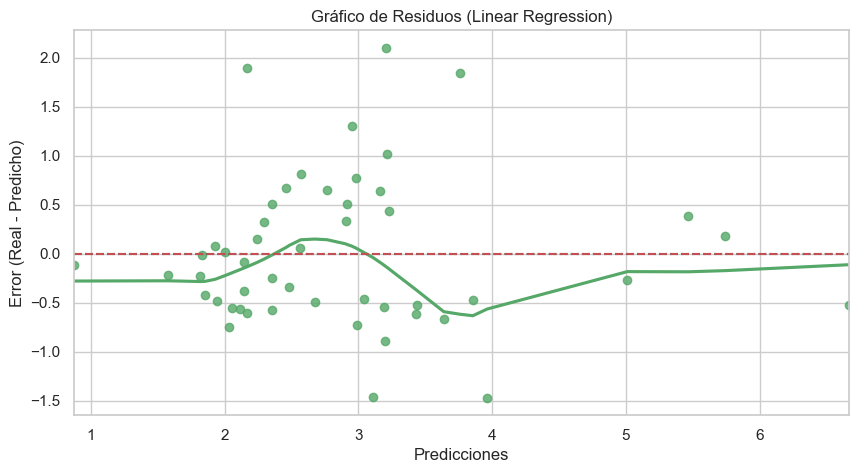

In [5]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_lr, y=residuals, lowess=True, color="g")
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuos (Linear Regression)')
plt.xlabel('Predicciones')
plt.ylabel('Error (Real - Predicho)')
plt.show()

---

**Anterior:** [09.01 - Scikit-learn Intro](./09_01_scikit_learn_intro.ipynb)  
**Siguiente:** [09.03 - Clasificacion](./09_03_classification.ipynb)